In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
df.head() # just keep text and target

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
y = df['target']
X = df['text']

In [5]:
# remove stop words and count then with countvectorizer and give a score to each-one

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)

tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(X_vec)
X_tfidf = X_tfidf.todense()
X_tfidf

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=0)

In [7]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [8]:


#--------INSTANTIATE-----------
nbm = MultinomialNB()
bnb = BernoulliNB()
ada = AdaBoostClassifier()
log = LogisticRegression()
dtree = DecisionTreeClassifier(max_depth=2)
#-------train the model---------
nbm.fit(X_train, y_train)
ada.fit(X_train, y_train)
bnb.fit(X_train, y_train)
log.fit(X_train, y_train)
dtree.fit(X_train, y_train)

#----------predictions------
y_pred1 = nbm.predict(X_test) # Naive Bayes
y_pred2 = ada.predict(X_test) # AdaBoost
y_pred3 = bnb.predict(X_test) # Bernoulli
y_pred4 = log.predict(X_test) # LogReg
y_pred5 = dtree.predict(X_test)# Decision Tree

#----------score------------
nbm_score = nbm.score(X_test, y_test)
ada_score = ada.score(X_test, y_test)
bnb_score = bnb.score(X_test, y_test)
log_score = log.score(X_test, y_test)
dtree_score = dtree.score(X_test, y_test)

#----------------------------


 NBM score : 0.80 , AdaBoost score: 0.75, Bernoulli: 0.80, LinearRegression: 0.81,Decision Tree: 0.66


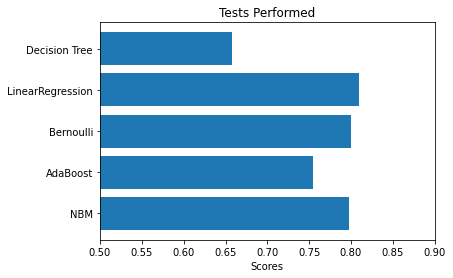

In [9]:
print(f" NBM score : {nbm_score:.2f} , AdaBoost score: {ada_score:.2f}, Bernoulli: {bnb_score:.2f}, LinearRegression: {log_score:.2f},\
Decision Tree: {dtree_score:.2f}")


import matplotlib.pyplot as plt

fig, ax = plt.subplots()
scores = [nbm_score, ada_score, bnb_score, log_score, dtree_score]
test = ["NBM", "AdaBoost", "Bernoulli", "LinearRegression", "Decision Tree"]
ax.barh(test, scores, align='center')
ax.set_xlabel('Scores')
ax.set_title('Tests Performed')
plt.xlim([0.5, 0.9])
plt.show()

<AxesSubplot:>

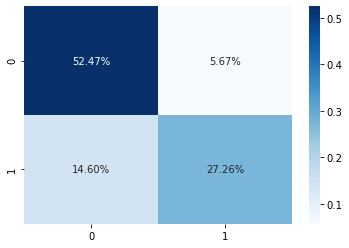

In [10]:
from sklearn.metrics import confusion_matrix 
cm_nbm = confusion_matrix(y_test ,y_pred1)
cm_linreg = confusion_matrix(y_test ,y_pred4)
cm_bern = confusion_matrix(y_test ,y_pred3)

import seaborn as sns

sns.heatmap(cm_nbm/np.sum(cm_nbm), annot=True, 
            fmt='.2%', cmap='Blues')


<AxesSubplot:>

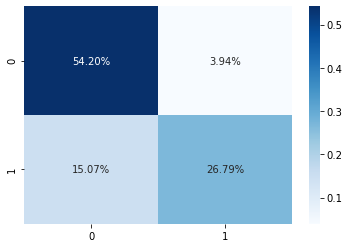

In [11]:
sns.heatmap(cm_linreg/np.sum(cm_linreg), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

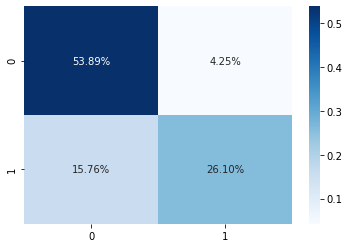

In [12]:

sns.heatmap(cm_bern/np.sum(cm_bern), annot=True, 
            fmt='.2%', cmap='Blues')

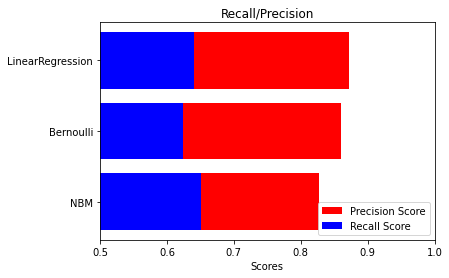

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score
nb_prec = precision_score(y_test ,y_pred1)  
nb_recall = recall_score(y_test ,y_pred1)
nb_f1 = f1_score(y_test ,y_pred1)

bern_prec = precision_score(y_test ,y_pred3)  
bern_recall = recall_score(y_test ,y_pred3)
bern_f1 = f1_score(y_test ,y_pred1)

linreg_prec = precision_score(y_test ,y_pred4)  
linreg_recall = recall_score(y_test ,y_pred4)
linreg_f1 = f1_score(y_test ,y_pred4)



fig, ax = plt.subplots()
precicion = [nb_prec,bern_prec,linreg_prec]
recall = [nb_recall, bern_recall, linreg_recall]
test = ["NBM", "Bernoulli", "LinearRegression"]

plt.barh(test, precicion, label="Precision Score", color="red")
plt.barh(test, recall, align='center', label="Recall Score", color="blue")
plt.legend(loc="lower right")
ax.set_xlabel('Scores')
ax.set_title('Recall/Precision')
plt.xlim([0.5, 1.0])
plt.show()

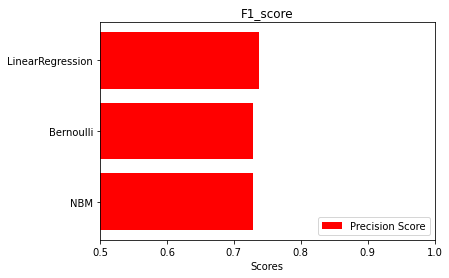

In [14]:
fig, ax = plt.subplots()
scores = [nb_f1, bern_f1, linreg_f1]

test = ["NBM", "Bernoulli", "LinearRegression"]

plt.barh(test, scores, label="Precision Score", color="red")
plt.legend(loc="lower right")
ax.set_xlabel('Scores')
ax.set_title('F1_score')
plt.xlim([0.5, 1.0])
plt.show()

In [15]:
df_t = pd.read_csv('test.csv')
df_t.head()
X_t = df_t['text']


In [16]:
vectorizer_t = CountVectorizer(stop_words='english')
X_t_vec = vectorizer.fit_transform(X)

tfidf_t = TfidfTransformer()
X_t_tfidf = tfidf.fit_transform(X_t_vec)
X_t_tfidf = X_t_tfidf.todense()
X_t_tfidf

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
log_t = LogisticRegression()
log_t.fit(X_train, y_train)
y_pred_t = log.predict(X_t_tfidf) 

In [18]:
y_proba = log.predict_proba(X_t_tfidf)
y_proba

array([[0.43067095, 0.56932905],
       [0.26921772, 0.73078228],
       [0.43950888, 0.56049112],
       ...,
       [0.22574184, 0.77425816],
       [0.37577752, 0.62422248],
       [0.05395619, 0.94604381]])

In [19]:
df_predict = pd.DataFrame(X_t, columns=['text'])
y_pred_df = pd.DataFrame(y_pred_t, columns=['target'])
y_pred_proba_df = pd.DataFrame(y_proba, columns=['prob is not a disaster','prob is a disaster'])


In [20]:
frame = [df_predict, y_pred_df,y_pred_proba_df]
df_submission = pd.concat(frame, axis=1)

In [71]:
import nltk 
nltk.download('stopwords') 
stopwords = nltk.corpus.stopwords.words("english") + ['co', 'https', 'http', "û", 'u','Û','Û_' ,'Ûª']

true_accidents = []
for i in range(len(df_submission['text'])):
    if df_submission['target'][i] == 1:
        true_accidents.append(df_submission['text'][i])
true_accidents_str = ""
for i in true_accidents:
    i = str(i)
    true_accidents_str += i 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jeronimo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
false_accidents = []
for i in range(len(df_submission['text'])):
    if df_submission['target'][i] == 0:
        false_accidents.append(df_submission['text'][i])
false_accidents_str = ""
for i in false_accidents:
    i = str(i)
    false_accidents_str += i


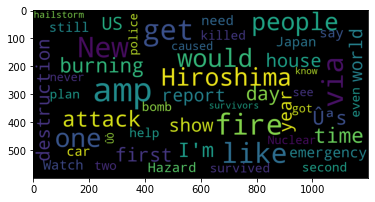

In [73]:
from wordcloud import WordCloud, STOPWORDS

word_cloud = WordCloud(background_color='black', max_words=50,max_font_size=40, scale=3, random_state=10, stopwords=stopwords).generate(true_accidents_str)
plt.imshow(word_cloud)
plt.show()


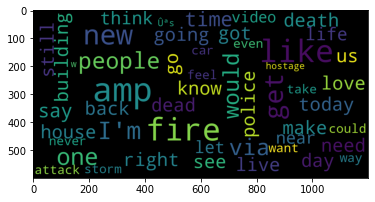

In [74]:
word_cloud = WordCloud(background_color='black', max_words=50,max_font_size=40, scale=3, random_state=10, stopwords=stopwords).generate(false_accidents_str)
plt.imshow(word_cloud)
plt.show()

In [76]:
df_submission.head()

,text,target,prob is not a disaster,prob is a disaster
0,Just happened a terrible car crash,1,0.430671,0.569329
1,"Heard about #earthquake is different cities, s...",1,0.269218,0.730782
2,"there is a forest fire at spot pond, geese are...",1,0.439509,0.560491
3,Apocalypse lighting. #Spokane #wildfires,1,0.210419,0.789581
4,Typhoon Soudelor kills 28 in China and Taiwan,0,0.663029,0.336971


In [77]:
df_submission.to_csv('NLP_disaster_predictor.csv')
